<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Преобразование-категориальных-признаков" data-toc-modified-id="Преобразование-категориальных-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Преобразование категориальных признаков</a></span></li><li><span><a href="#Балансировка-классов" data-toc-modified-id="Балансировка-классов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Балансировка классов</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель:** построить модель, предсказывающую **факт ухода клиента** с максимально большой F-1 мерой

**Тип задачи:** бинарная классификация

**Признаки:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак:**
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
# Импортируем пандас для работы с табличными
import pandas as pd

In [2]:
# Читаем данные из файла и сохраняем их в переменную
data = pd.read_csv('datasets/Churn.csv')

In [3]:
# Выведем 5 случайных записей
data.sample(5, random_state=2007)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6998,6999,15640074,Barrett,666,Spain,Female,47,5.0,0.00,1,0,0,166650.90,1
7029,7030,15672432,Giles,594,France,Female,53,4.0,0.00,1,1,0,5408.74,1
1297,1298,15793247,Hancock,498,France,Male,34,5.0,0.00,2,1,1,91711.66,0
7073,7074,15585855,Gould,679,France,Male,40,1.0,0.00,1,1,1,16897.19,0
8923,8924,15570002,Burlingame,625,Germany,Female,55,8.0,118772.71,4,0,0,135853.62,1


Данные были получены. Рассмотрим их более подробно:

In [4]:
# Выводим основную информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Вывод:**
- У нас в распоряжении таблица данных, в которой **10000** объектов и **14** признаков
- Большая часть данных – числовые. Данные имеют следующие типы:
    - **8** целочисленных (int64)
    - **3** с плавающей точкой (float64)
    - **3** строковые (object)
- Почти все объекты не имеют пропусков. Они есть только у одного признака – **Tenure**. <br>
Он содержит информацию о том, сколько лет человек является клиентом банка.<br>
Около **1000** записей имеют пустые строки.<br>
Многие модели машинного обучения не умеют работать с пустыми строками в числовых столбцах, поэтому нужно от них избавиться.<br>
Конечно, можно просто выкинуть строки с пропусками, но данные — это ценный ресурс, тем более, когда их так мало.<br>
Мы просто заменим их на **0**.<br> 
Может быть, эти клиенты действительно пользуются банком меньше года, но не исключено что алгоритм, собирающий данные, просто дал сбой

In [5]:
# Копируем данные в новую переменную
data_fix = data.copy()

# Заполняем пустые значения нулями
data_fix['Tenure'] = data_fix['Tenure'].fillna(0) 

Первичная подготовка данных была завершена.<br>
В следующем разделе мы будем исследовать данные более подробно и возможно что-то также поправим

## Исследование задачи

В данном разделе мы часто будем выводить графики,<br>поэтому импортируем необходимые библиотеки для красивого отображения

In [6]:
# Импортируем модуль для работы с выводом элементов
from IPython.core.display import HTML
# Библиотека для красивых графиков
import seaborn as sns
# Делаем красивый стиль
sns.set_style("darkgrid")

In [7]:
# Зададим вывод графиков по центру страницы
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Для начала, рассмотрим баланс классов целевого признака:

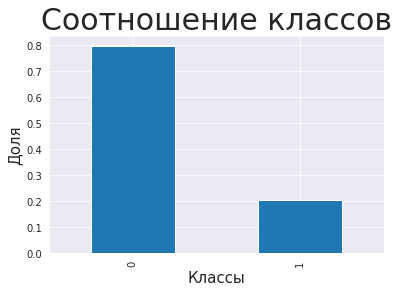

In [8]:
# Выведем соотношение классов в долях
ax = (data_fix['Exited'].value_counts(normalize=True)
                .plot(kind='bar'))
# Выводим заголовок таблицы
ax.set_title('Соотношение классов', fontsize = 30)
# Выводим подпись оси X
ax.set_xlabel('Классы', fontsize = 15)
# Выводим подпись оси Y
ax.set_ylabel('Доля', fontsize = 15);

**80%** оставшихся и **20%** ушедших. Это говорит о сильном дисбалансе в сторону негативного класса.<br>
В следующем разделе постараемся решить эту проблему, а пока посмотрим на другие признаки.

Чтобы не выводить лишнюю информацию, сразу удалим столбцы, которые нам никак не пригодятся в исследовании:
- **RowNumber** – эта переменная показывает просто номер строки. Её положение никак не может повлиять на целевую переменную
- **CustomerId** – ID пользователя тоже нам ничем не поможет. В таблице 10к уникальных записей этого поля поэтому оно нам ничего не даст
- **Surname** – В таблице около 3 тыс. разных фамилий. Если применять для этого прямое кодирование, то это только увеличит время обучения модели, а более высокого результата не даст.<br>
Но главная причина, по которой не следует использовать имена, заключается в том, что если на ход поступят данные с именем, которое не было при обучении, модель не сможет сделать предсказание.

In [9]:
# Удаляем лишние столбцы
data_fix = data_fix.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
# Выведем первые 5 записей
data_fix.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


У нас есть **6** числовых столбцов **(Столбцы где только 0 и 1 не учитываем)**:<br>
- **4** дискретных:
    - CreditScore (460 уникальных)
    - Age (70 уникальных)
    - Tenure (11 уникальных)
    - NumOfProducts (4 уникальных)
- **2** непрерывных:
    - Balance (0 - 250898)
    - EstimatedSalary (11 - 199992)<BR>

И **5** категориальных:
- **1** Мульти класс:
    - Geography
- **4** Бинарный класс: 
    - Gender
    - HasCrCard
    - IsActiveMember
    - Exited
    
На основе данной информации построим соответствующие графики, которые помогут выявить связи с целевой переменной и найти мультиколлениарные (одинаковые) признаки.

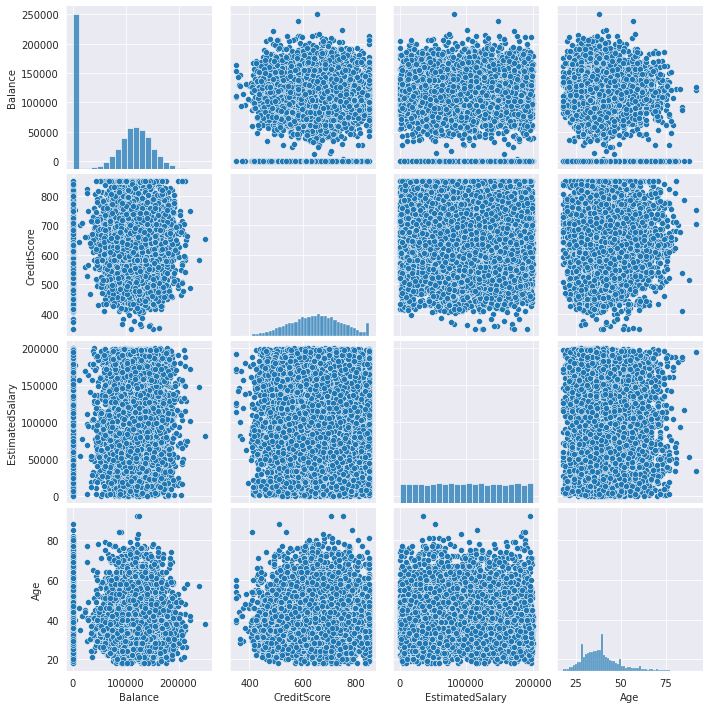

In [11]:
# Построим диаграмму рассеивания по множественным числовым признакам
sns.pairplot(data_fix[['Balance', 'CreditScore', 'EstimatedSalary', 'Age']]);

Как видно из графиков, нигде не прослеживается взаимосвязь, значит **мультиколлениарных** признаков в датафрейме нет.<br><br>
Рассмотрим связи других переменных с целевым признаком.<br>
Первое что хочется проверить, это связь целевого признака с количеством лет пользования банком.

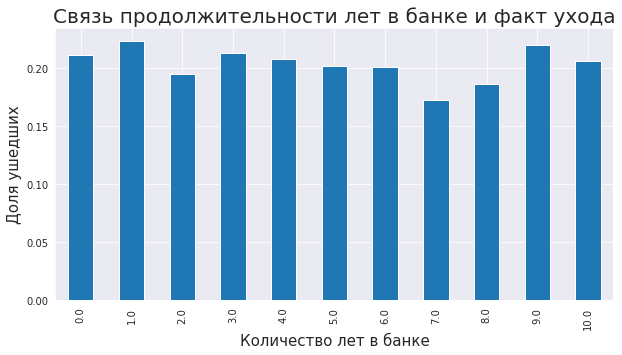

In [12]:
# Создаём столбчатый график
ax = (data_fix.pivot_table(index=['Tenure'], values=['Exited'], aggfunc='mean')
            .plot(kind='bar', figsize=(10,5), legend=False))
# Выводим заголовок таблицы
ax.set_title('Связь продолжительности лет в банке и факт ухода', fontsize = 20)
# Выводим подпись оси X
ax.set_xlabel('Количество лет в банке', fontsize = 15)
# Выводим подпись оси Y
ax.set_ylabel('Доля ушедших', fontsize = 15);

Как видно из графика, количество лет использования банка не сильно влияет на факт ухода.<br>
Доля ушедших в каждой категории близка к друг-другу.<br>
<br>
Посмотрим связь ухода с возрастом клиентов:

In [13]:
# Библиотека для настройки графиков
import ipywidgets as widgets
# Библиотека для настройки графиков
import matplotlib.pyplot as plt

In [14]:
# Создаем функцию, которая будет отрисовывать график
def exited_age_bar(b):
    '''
    Выводит столбчатый график по возрасту и факту ухода
            Параметры:
                    b (int): Число в диапазоне от 1 до 477.
                    Назначает минимальное количество объектов в данной возрастной категории
    '''
    # Создаём столбчатый график
    ax = (data_fix.groupby('Age')['Exited'].agg(['count', 'mean'])
                .query(f'count > {b}')['mean']
                .plot(kind='bar', figsize=(15,5), legend=False, rot=45))
    # Выводим заголовок таблицы
    ax.set_title('Связь возраста и факта ухода', fontsize = 20)
    # Выводим подпись оси X
    ax.set_xlabel('Возраст клиентов', fontsize = 15)
    # Выводим подпись оси Y
    ax.set_ylabel('Доля ушедших', fontsize = 15)
    # Показываем график
    plt.show()
    
# Выводим отдельно название виджета, т.к. оно слишком длинное
display(widgets.HTML(value = f"<b><font size=3px>Количество объектов в возрастной группе:</b>"))
# Выводим интерактивный виджет ползунка
widgets.interact(exited_age_bar, 
                    b=widgets.IntSlider(151,1,477,10,description=' ',
                                           layout=widgets.Layout(width='90%')));

HTML(value='<b><font size=3px>Количество объектов в возрастной группе:</b>')

interactive(children=(IntSlider(value=151, description=' ', layout=Layout(width='90%'), max=477, min=1, step=1…

Как видно на графике, процент ушедших с возраста **35** лет идет на повышение и к **48** годам составляет уже **50%**. Какая-то связь прослеживается.

In [15]:
# Создаем функцию, которая будет отрисовывать график
def exited_creditscore_bar(b, mean=True, ci_low=True, ci_high=True):
    '''
    Выводит столбчатый график по кредитному рейтингу и факту ухода.
    На графике отображена доля ушедших, а также границы доверительного интервала 95%
    
            Параметры:
                    b (int): Количество разбиений кредитного рейтинга.
    '''
    # Делим рейтинг на диапазоны
    data_fix['CreditScore_cut'] = pd.cut(data_fix['CreditScore'], b)

    # Группируем по диапазонам рейтинга, находим среднее и несмещенную стандартную ошибку среднего
    # Находим верхнюю и нижнюю границы доверительного интервала ci (confidence Interval) 95%
    stats = data_fix.groupby('CreditScore_cut')['Exited'].agg(['mean', 'sem'])
    stats['ci95_high'] = stats['mean'] + 1.96* stats['sem']
    stats['ci95_low'] = stats['mean'] - 1.96* stats['sem']

    # Создаём столбчатый график для максимума доверительного интервала
    ax = (stats[['ci95_high']]
          .plot(kind='bar', figsize=(15,5), rot=90, stacked=True,
                color='#d48190', alpha=(0.4 if ci_high else 0)))
     
    # Для среднего
    ax = stats[['mean']].plot(kind='bar', color='#216bff', alpha=(0.7 if mean else 0), ax=ax)
    
    # Для минимума доверительного интервала
    ax = stats[['ci95_low']].plot(kind='bar', color='#9dc9a2', alpha=(0.7 if ci_low else 0), ax=ax)
    
    ax.legend(['Максимум', 'Доля ушедших(Среднее)', 'Минимум']);
    # Выводим заголовок таблицы
    ax.set_title('Связь кредитного рейтинга и факта ухода', fontsize = 20)
    # Выводим подпись оси X
    ax.set_xlabel('Диапазоны кредитного рейтинга', fontsize = 15)
    # Выводим подпись оси Y
    ax.set_ylabel('Доля ушедших', fontsize = 15)
    # Показываем график
    plt.show()
    # Удаляем вспомогательный столбец
    data_fix.drop('CreditScore_cut', axis=1, inplace=True)
    
# Выводим отдельно название виджета, т.к. оно слишком длинное
display(widgets.HTML(value = f"<b><font size=3px>Количество делений кредитного рейтинга:</b>"))
# Выводим интерактивный виджет ползунка и чекбоксов
widgets.interact(exited_creditscore_bar, 
                    b=widgets.IntSlider(30,1,40,1,description=' ',layout=widgets.Layout(width='90%')),
                    mean=widgets.Checkbox(value=True, description='Среднее'),
                    ci_low=widgets.Checkbox(value=True, description='Минимум'),
                    ci_high=widgets.Checkbox(value=True, description='Максимум'));

HTML(value='<b><font size=3px>Количество делений кредитного рейтинга:</b>')

interactive(children=(IntSlider(value=30, description=' ', layout=Layout(width='90%'), max=40, min=1), Checkbo…

На данном графике также показан **доверительный интервал 95%**, чтобы примерно прикинуть разброс значений.<br>
Самая большая доля ушедших, у клиентов с самым низким кредитным рейтингом **(350-400)**

По жизненному опыту, можно сделать предположение: <br>
человек стал клиентом банка, чтобы ему оформили кредит, а банк ему отказывает, из-за низкого кредитного рейтинга (это не всегда значит, что человек не возвращает долги, а просто высокий риск для банка, который высчитывается по определенным формулам). Человек, который обращался в банк за кредитом и не получил его, сразу-же уходит

In [16]:
# Импортируем функцию для очистки вывода
from IPython.display import clear_output

In [17]:
button_ch = widgets.Button(description='Связь')

def exited_numofproducts_bar(n):
    '''
    Выводит два столбчатых графика, которые показывают количество элементов в группе и долю ушедших в каждой группе.
    Переключение графиков осуществляется нажатием кнопки.
    
            Параметры:
                    n: Заглушка. В функции никак не используется, но требуется для работы виджета.
    '''
    # Находим верхнюю и нижнюю границы доверительного интервала ci (confidence Interval) 95%
    stats = data_fix.groupby('NumOfProducts')['Exited'].agg(['count', 'mean', 'sem'])
    stats['ci95_high'] = stats['mean'] + 1.96* stats['sem']
    stats['ci95_low'] = stats['mean'] - 1.96* stats['sem']
    if button_ch.description == 'Связь':
        # Создаём столбчатый график для максимума доверительного интервала
        ax = (stats[['ci95_high']]
              .plot(kind='bar', figsize=(15,3), rot=90, stacked=True,
                    color='#d48190', alpha=0.4))
        # Для среднего
        ax = stats[['mean']].plot(kind='bar', color='#216bff', alpha=0.7, ax=ax)
        # Для минимума доверительного интервала
        ax = stats[['ci95_low']].plot(kind='bar', color='#9dc9a2', alpha=0.7, ax=ax)
        # Вывод легенды
        ax.legend(['Максимум', 'Доля ушедших(Среднее)', 'Минимум']);
        # Выводим заголовок таблицы
        ax.set_title('Связь количества продуктов и факта ухода', fontsize = 20)
        # Выводим подпись оси X
        ax.set_xlabel('Количество продуктов банка', fontsize = 15)
        # Выводим подпись оси Y
        ax.set_ylabel('Доля ушедших', fontsize = 15)
        # Выводим график
        button_ch.description = 'Количество'
        clear_output()
        display(button_ch)
        plt.show()
    else:
        ax = stats[['count']].plot(kind='bar', figsize=(15,3), rot=90, stacked=True, legend=False);
        # Выводим заголовок таблицы
        ax.set_title('Связь количества продуктов у клиентов', fontsize = 20)
        # Выводим подпись оси X
        ax.set_xlabel('Количество клиентов', fontsize = 15)
        # Выводим подпись оси Y
        ax.set_ylabel('Доля ушедших', fontsize = 15)
        # Выводим количество записей
        for i, count in enumerate(stats['count']):
            plt.text(x=i, y=count+50, s=count, ha='center', va='bottom')  
        # Выводим график
        button_ch.description = 'Связь'
        clear_output()
        display(button_ch)
        plt.show()
    
button_ch.on_click(exited_numofproducts_bar)
button_ch

Button(description='Связь', style=ButtonStyle())

Как видно на графике с количеством, клиентов у которых **1** или **2** продукта, составляют большинство, а вот **3** и **4** продукта – редкость.<br>

Тут тоже прослеживается связь, что из клиентов, у которых был один продукт ушло **27%**, а у тех, у кого было два – **7%**. Клиентов с **3 и 4** продуктами мы не рассматриваем, т.к. выборки малы

In [18]:
# Для рассмотрения категориальных переменных напишем функцию
def exited_category(category, title):
    '''
    Выводит два столбчатых графика, которые показывают количество элементов в категории и долю ушедших.
    Переключение графиков осуществляется нажатием кнопки.
    
            Параметры:
                    category: название столбца, по которому будет строиться график.
                    title: название на графике.
    '''
    # Получаем сводную таблицу по категории
    stats = data_fix.pivot_table(index=[category], values=['Exited'], aggfunc=['mean', 'count'])
    # Избавляемся от мульти столбцов
    stats.columns = stats.columns.droplevel(1)
    # Находим число ушедших
    stats['frac_mean'] = stats['count'] * stats['mean']

    # добавляем график по количеству ушедших
    # Переносим его на передний план с помощью zorder
    ax = stats['frac_mean'].plot(kind='bar', figsize=(10,5), rot=0, alpha=0.7, color='green', zorder=2)
    # добавляем график по общему количеству
    ax = stats['count'].plot(kind='bar', figsize=(10,5), rot=0, alpha=0.2, color='blue', zorder=1, ax=ax)

    # Выводим заголовок таблицы
    ax.set_title(f'Связь "{title}" и факта ухода', fontsize = 20)
    # Выводим подпись оси X
    ax.set_xlabel(title, fontsize = 15)
    # Выводим подпись оси Y
    ax.set_ylabel('Доля ушедших', fontsize = 15)
    # Выводим легенду
    ax.legend(['Доля ушедших', 'Количество клиентов'])

    # Добавляем текстовые метки
    for i in range(len(stats)):
        # Текущая фигура
        p = ax.patches[i]
        # Среднее
        mean = stats.reset_index().loc[i, 'mean']
        # Выводим проценты над фигурами
        ax.text(p.get_x() + p.get_width()/2, p.get_height()+100, f'{mean:.2%}', ha="center", fontsize=14)

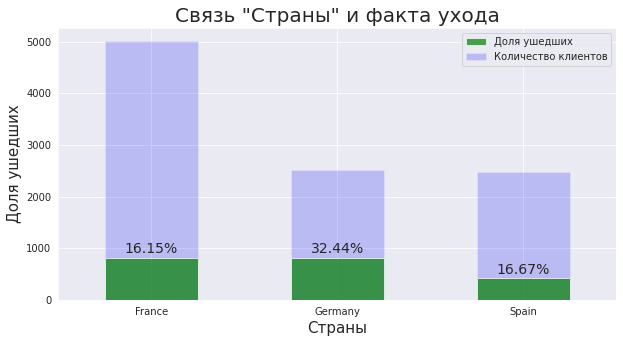

In [19]:
# График по странам
exited_category('Geography', 'Страны')

Больше всего клиентов из **Франции** (**~5000**), однако там самый низкий процент ушедших (**16%**). У **Германии** и **Испании** примерно одинаковое количество клиентов (**~2500**), но в Германии процент ушедших больше (**32%**).

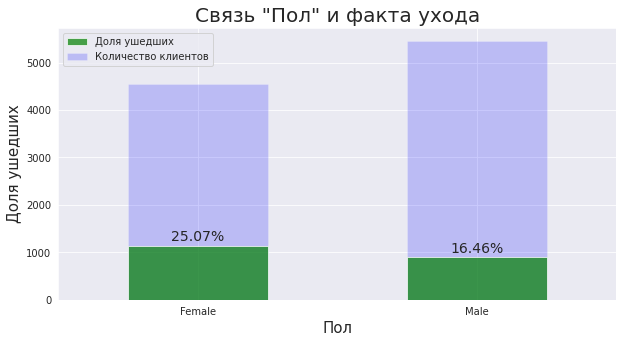

In [20]:
# График по полу
exited_category('Gender', 'Пол')

Клиентов **мужчин** в банке **больше**, а по количеству ушедших между мужчина и женщинами не особо большая разница (примерно по **1000** у каждого)<br>
Судя по всему тут особой связи и нет

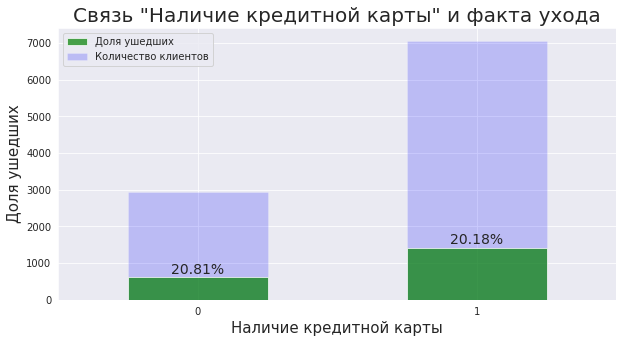

In [21]:
# График по карте
exited_category('HasCrCard', 'Наличие кредитной карты')

Клиентов с картой в два раза больше, чем без, при этом, в процентом соотношении число ушедших примерно одинаково (**20%**), однако в количественном, ушедших с картой больше.

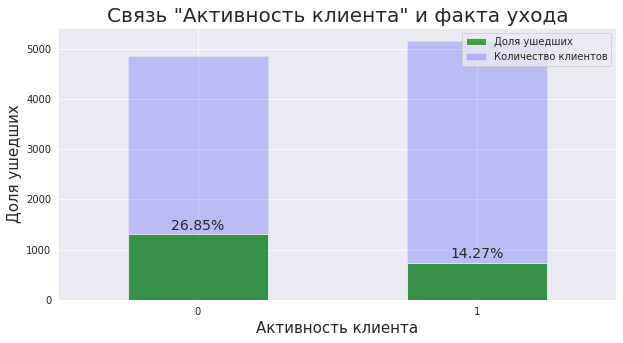

In [22]:
# График по активности
exited_category('IsActiveMember', 'Активность клиента')

Активных и неактивных клиентов примерно равное количество, но неактивные, что логично, чаще уходят из банка (**27%**). Ведь зачем оставаться в банке, которым не пользуешься

In [23]:
# Посмотрим на линейную корреляцию
data_fix.corr()['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.013319
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

Все связи очень слабые, однако самой сильной среди них является возраст **(0.28)**, что все равно считается очень маленькой связью.
Когда мы анализировали связь возраста с узодом, мы заметили, что от **37** идёт рост ушедших клиентов.

В результате анализа можно сделать следующие **выводы**:
- Мы удалили лишние столбцы, которые никак нам не пригодятся в исследовании (**'RowNumber', 'CustomerId', 'Surname'**)
- Мы имеем сильный дисбаланс классов у целевой переменной (**80%** оставшихся и **20%** ушедших)
- Среди числовых переменных **не было** найдено **мультиколениарных** столбцов, поэтому все пойдет в обучение
- Количество лет использования в банке ни о чем не горит. Отток клиентов происходит в независимости от количества лет использования
- А вот возраст клиентов, как оказалось, играет какую-то роль. Если клиент старше **35 лет**, то с каждым последующим годом вероятность ухода повышается. Не совсем понятно как это связано
- Из клиентов с низким кредитным рейтингом (**350-400**) 100% уход
- Большая часть клиентов имеют только один продукт, другая половинная **2**, клиентов с **3 и 4** продукта меньше всего. Доля ушедших клиентов, у которых **2** продукта – уходят в **7%** случаев, в то время как у клиентов с **1** продуктом процент ухода **27%**. Пользователей с **3** и **4** продуктов мало, но процент ухода у них близок к **100%**
- Большая часть клиентов из Франции – у них процент ухода **16%**, Германия и Испания в **2** раза меньше по количеству клиентов. У Германии отток составил **32%**, у Испании **16.7%**
- Нет связи оттока клиентов по половому признаку
- Клиентов с кредитной картой почти в **2** раза больше, чем без неё. С кредитной картой отток **20%**, без неё **21%**
- Неактивный клиенты уходят чаще, чем активный. У неактивных отток **26%**, у активных **14%**

## Борьба с дисбалансом

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
    
Поменял последовательность действий. Ранее у меня было масштабирование, кодировка, разделение. <br>
Из Вашего пояснения узнал об утечке данных и понял почему так делать нельзя: например, при масштабировании мы используем все данные, которые есть, если мы делаем это до разделения, то модель может найти эту закономерность и выдавать искусственно хорошие результаты. Тестовая выборка должна быть скрыта☝.
</div>

Нам известно, что у нас сильный дисбаланс классов (**80%** оставшихся и **20%** ушедших). Есть **3** способа, для борьбы с дисбалансом:
- взвешивание классов
- upsampling
- downsampling
- Также мы попробуем создать синтетические данные с помощью SMOTE

Мы попробуем 4 разных способа и выберем лучший, но для начала подготовим данные для обучения:

### Разделение данных

Пользоваться отдельными переменными **(target и features)** не очень удобно, поэтому мы сделаем только переменные, в которых будут храниться названия нужных столбцов:

In [24]:
# Список признаков
X = data_fix.drop(['Exited'], axis=1).columns
# Целевая переменная
y = 'Exited'

Т.к. мы будем использовать готовые инструменты для поиска наилучших гиперпараметров (**Greed Search**, **Random Search**), то они уже предусматривают разделение выборки на обучающую и валидационную.<br>
Поэтому на данном этапе мы раздели выборку только на обучающую и тестовую, в соотношение **4:1**

In [25]:
# Импортируем функцию для разделения выборки
from sklearn.model_selection import train_test_split

In [26]:
# Получаем обучающую и тестовую выборки
data_train, data_test = train_test_split(data_fix, test_size=.2, random_state=2007)

### Масштабирование признаков

In [27]:
## Было (убрал эту промежуточную переменную, т.к. мы сразу делим выше ⏏ уже есть переменная data_train и data_test)
# # Копируем данные в новую переменную
# data_for_model = data_fix.copy()

Приведем все числовые признаки к одному масштабу.
У нас есть 6 следующих числовых признаков:
- CreditScore (460 уникальных)
- Age (70 уникальных)
- Tenure (11 уникальных)
- NumOfProducts (4 уникальных)
- Balance (0 - 250898)
- EstimatedSalary (11 - 199992)

Бинарные переменные (где только **0 и 1**) мы масштабировать не будем, т.к. разница между ними очень мала

In [28]:
# Сохраним столбцы с числовым типом в переменную
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']

In [29]:
# Импортируем структуру для масштабирования данных
from sklearn.preprocessing import StandardScaler 

In [30]:
# Создаем объект этой структуры
scaler = StandardScaler()
# Настраиваем на обучающих данных
scaler.fit(data_train[numeric_columns])

# Стало
# Преобразуем масштабированные признаки и сохраняем в разделенные фреймы
# Отключаем предупреждение
pd.options.mode.chained_assignment = None
# Обучающий
data_train[numeric_columns] = scaler.transform(data_train[numeric_columns])
# Тестовый
data_test[numeric_columns] = scaler.transform(data_test[numeric_columns])
# Включаем обратно
pd.options.mode.chained_assignment = 'warn'

In [31]:
# # Было
# # Преобразуем масштабированные признаки и сохраняем в исходный датафрейм
# data_for_model[numeric_columns] = scaler.transform(data_for_model[numeric_columns])

In [32]:
# Посмотрим на результат обучающей выборки
data_train[numeric_columns].head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
1232,-0.652583,0.685323,1.424330,-0.916006,0.496923,0.687976
1611,1.137339,0.972549,1.424330,-0.916006,0.234616,0.301326
4167,2.068513,-0.463584,1.103354,-0.916006,1.963122,-0.554370
347,-0.073186,1.929972,-1.464452,-0.916006,1.499447,-1.180283
7796,0.433786,-0.272099,-0.501525,0.807835,-1.233583,-1.596396


In [33]:
# Посмотрим на результат тестовой выборки
data_test[numeric_columns].head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
6998,0.164780,0.781065,0.140427,-0.916006,-1.233583,1.162097
7029,-0.580159,1.355518,-0.180549,-0.916006,-1.233583,-1.646447
1297,-1.573411,-0.463584,0.140427,0.807835,-1.233583,-0.143207
7073,0.299283,0.110869,-1.143476,-0.916006,-1.233583,-1.446339
8923,-0.259421,1.547003,1.103354,4.255519,0.672169,0.625665


Теперь числовые данные одного масштаба

### Преобразование категориальных признаков

Для преобразования категориальных значений воспользуемся техникой **прямого кодирования**. У нас всего **2** категориальные переменные: 
- Geography (3 уникальных)
- Gender (2 уникальных)

Получается, что будет всего 3 доп. столбца

In [34]:
# # Было
# # Преобразовываем категориальные переменные, избавляемся от дамми-ловушки
# data_for_model = pd.get_dummies(data_for_model, drop_first=True)

In [35]:
# Стало
# Преобразовываем категориальные переменные, избавляемся от дамми-ловушки
# Для обучающей
data_train = pd.get_dummies(data_train, drop_first=True)
# Для тестовой
data_test = pd.get_dummies(data_test, drop_first=True)

In [36]:
# Посмотрим на результат обучающей
data_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1232,-0.652583,0.685323,1.424330,0.496923,-0.916006,1,0,0.687976,1,1,0,1
1611,1.137339,0.972549,1.424330,0.234616,-0.916006,1,0,0.301326,1,1,0,0
4167,2.068513,-0.463584,1.103354,1.963122,-0.916006,0,0,-0.554370,0,0,1,1
347,-0.073186,1.929972,-1.464452,1.499447,-0.916006,1,1,-1.180283,0,1,0,1
7796,0.433786,-0.272099,-0.501525,-1.233583,0.807835,1,1,-1.596396,0,0,0,0


In [37]:
# Посмотрим на результат тестовой
data_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6998,0.164780,0.781065,0.140427,-1.233583,-0.916006,0,0,1.162097,1,0,1,0
7029,-0.580159,1.355518,-0.180549,-1.233583,-0.916006,1,0,-1.646447,1,0,0,0
1297,-1.573411,-0.463584,0.140427,-1.233583,0.807835,1,1,-0.143207,0,0,0,1
7073,0.299283,0.110869,-1.143476,-1.233583,-0.916006,1,1,-1.446339,0,0,0,1
8923,-0.259421,1.547003,1.103354,0.672169,4.255519,0,0,0.625665,1,1,0,0


In [38]:
# Стало
# В связи с тем, что количество столбцов было изменено, обновим наш список названий столбцов
# Список признаков
X = data_train.drop(['Exited'], axis=1).columns

Было **11** столбов, а стало **12**, что не особо критично для скорости обучения

### Балансировка классов

Теперь, когда данные подготовлены, мы сбалансируем классы разными методами:

#### Взвешивание классов

In [39]:
# Импортируем функцию для взвешивания классов
from sklearn.utils.class_weight import compute_class_weight

<div class="alert alert-block alert-info">
<b>Изменения:</b>
Поправил переменные ниже. Ранее там ссылалось на всю выборку:<br>
<b>Было:</b> classes=data_for_model[y].unique()<br>
<b>Стало:</b> classes=data_train[y].unique()<br>
</div>

In [40]:
# Получаем массив весов класса
class_weights = compute_class_weight(class_weight='balanced', classes=data_train[y].unique(), y=data_train[y].values)
# Преобразуем массив в словарь
class_weights_dict = dict(zip(data_train[y].unique(), class_weights))

#### Upsampling

In [41]:
# Функция для перемешивания данных
from sklearn.utils import shuffle

In [42]:
# Создаем функцию, которая сбалансирует класс по технике upsample
def upsample_binar(data, target, random_state=None):
    '''
    Балансирует бинарный класс техникой upsample.
    Автоматически определяет каких значений меньше и дублирует их до соотношения 1 к 1
    
            Параметры:
                    data(Dataframe): набор данных, в которых нужно сбалансировать класс.
                    target(string): название признака, по которому нужно балансировать.
                    random_state: сид случайности.
    '''
    # Делим данные на два класса   
    data_0 = data.query(f'{target} == 0')
    data_1 = data.query(f'{target} == 1')
    # Определяем больший и меньший класс   
    smaller, bigger = (data_0, data_1) if len(data_1) > len(data_0) else (data_1, data_0)
    # Вычисляем количество повторений
    repeat = int(len(bigger) / len(smaller))
    # Находим остаток
    remains = len(bigger) - repeat*len(smaller)
    # Соединяем все вместе и перемешиваем
    return shuffle(pd.concat([bigger] + [smaller]*repeat + 
                             [smaller.sample(remains, random_state=random_state)]), random_state=random_state)

In [43]:
# Балансируем выборку
data_train_upsample = upsample_binar(data_train, 'Exited', random_state=2007)
# Выводим размер таблицы
data_train_upsample.shape

(12728, 12)

In [44]:
# Проверяем количество представителей класса
data_train_upsample['Exited'].value_counts()

0    6364
1    6364
Name: Exited, dtype: int64

#### Downsampling

In [45]:
# Создаем функцию, которая сбалансирует класс по технике downsample
def downsample_binar(data, target, random_state=None):
    '''
    Балансирует бинарный класс  техникой downsample.
    Автоматически определяет каких значений больше и уменьшает  до количества наименьшего класса
    
            Параметры:
                    data(Dataframe): набор данных, в которых нужно сбалансировать класс.
                    target(string): название признака, по которому нужно балансировать.
                    random_state: сид случайности.
    '''
    # Делим данные на два класса   
    data_0 = data.query(f'{target} == 0')
    data_1 = data.query(f'{target} == 1')
    # Определяем больший и меньший класс   
    smaller, bigger = (data_0, data_1) if len(data_1) > len(data_0) else (data_1, data_0) 
    # Соединяем все вместе и перемешиваем
    return shuffle(pd.concat([smaller] + [bigger.sample(len(smaller), random_state=random_state)]), random_state=random_state)

In [46]:
# Балансируем выборку
data_train_downsample = downsample_binar(data_train, 'Exited', random_state=2007)
# Выводим размер таблицы
data_train_downsample.shape

(3272, 12)

In [47]:
# Проверяем количество представителей класса
data_train_downsample['Exited'].value_counts()

0    1636
1    1636
Name: Exited, dtype: int64

#### SMOTE

In [48]:
# Для работы кода ниже,
# нужно раскоментировать этот код, чтобы библиотоека установилась
# Затем перезапустить ядро
!pip install imbalanced-learn

In [49]:
# Импортируем структуру данных для балансировки
from imblearn.over_sampling import SMOTE

In [50]:
# Создаем объект балансировки
smote = SMOTE(random_state=2007, k_neighbors=5)
# Балансируем классы
data_train_SMOTE_X, data_train_SMOTE_y = smote.fit_resample(data_train[X], data_train[y])
# Объединяем в единый датафрейм для удобства
data_train_SMOTE = data_train_SMOTE_X.join(data_train_SMOTE_y)
# Выводим размер таблицы
data_train_SMOTE.shape

(12728, 12)

In [51]:
# Проверяем количество представителей класса
data_train_SMOTE['Exited'].value_counts()

0    6364
1    6364
Name: Exited, dtype: int64

Датафрейм увеличился почти на **2,7 тыс.** записей, зато теперь, мы имеем идеальный баланс классов **1:1**

#### Обучение моделей

Данные выборок были получены, но чтобы их оценить – мы должны на них обучить модель.<br>
По результату прошлого проекта, было обнаружено, что лучшей моделью является **CatBoost**. Он показал самые высокие показатели, поэтому и в данном исследовании мы будем использовать его.

In [52]:
# Импортируем функции для расчета метрик 📈📉📊
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Импортируем нампи для некоторых операций со списками 🔢
import numpy as np
# Импортируем кэтбуст 😺😎
from catboost import CatBoostClassifier

Нам нужно подобрать лучшие гиперпараметры для разных данных, поэтому создадим функцию, которая будет делать это:

In [53]:
# Функция для поиска лучших гиперпараметров
def get_best_hparam(data, features, target, param, n_iter=20):
    '''
    Возвращает лучшие гиперпараметры модели CatBoost
    
            Параметры:
                    data(Dataframe): набор данных, по которым модель проводит обучение.
                    features(list): массив названий столбцов признаков.
                    target(string): название целевого признака.
                    param(dict): словарь гиперепараметров для поиска.
                    n_iter(int): количество итераций.
    '''
    # Создаем модель CatBoost. Отключаем вывод информации в консоль, 
    #    устанавливаем ключевую метрику Logloss
    model_CatBoost = CatBoostClassifier(logging_level='Silent', eval_metric='Logloss')
    # Запускаем случайный поиск
    #    Отключаем вывод логов в консоль, график оставляем
    grid_CatBoost = model_CatBoost.randomized_search(param, X=data[features], 
                                                     y=data[target], plot=True, 
                                                     n_iter=n_iter, verbose=False)
    return grid_CatBoost['params']

**Пояснение:** *У **CatBoost** есть возможность, при подборе гиперпараметров учитывать множество метрик, например **F1, accuracy, AUC**. Однако, как показала практика, лучше всего для подбора подходит метрика, идущая по умолчанию - **Logloss**, или **логарифмическая потеря**. Чем ниже данный показатель – тем лучше модель в конечном результате предсказывает.
Если заменить эту метрику на другую, то качество моделей сильно упадет, что было проверено*.

Теперь у нас есть функция, которую мы будем применять ко всем найденным данным:

In [54]:
%%time
# Формируем список гиперпараметров
param_CatBoost = {
    'random_state': [2007],
    'learning_rate': np.arange(0.1, 0.5, 0.01),
    'depth': [3],
    'l2_leaf_reg': np.arange(0, 4, 1),
    'iterations': np.arange(10, 150, 1)
    }

# Находим лучшие гиперпараметры для необработанных данных
param_imbalance = get_best_hparam(data_train, X, y, param_CatBoost, n_iter=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 11.1 s, sys: 439 ms, total: 11.5 s
Wall time: 12.7 s


**Пояснение:** *В проекте показаны только самые успешные решения, но перед этим было испробовано множество различных способов, потрачено много часов на поиск гиперпараметров.<br>
То, что сейчас стоит в словаре параметров – это те диапазоны, где сочетается наилучшее качество и скорость.<br>
Также следует отметить, что и без поиска гиперпараметров, по умолчанию модель CatBoost выдает очень высокие результаты*

In [55]:
# Выведем параметры
param_imbalance

{'depth': 3,
 'random_seed': 2007,
 'l2_leaf_reg': 3,
 'iterations': 106,
 'learning_rate': 0.30999999999999994}

Получили следующие гиперпараметры. Сохраним их. В дальнейшем, на стадии тестирования, мы загрузим их в модель.<br>
Проделаем аналогичные действия для других моделей:

In [56]:
%%time
# Формируем список гиперпараметров
param_CatBoost = {
    'random_state': [2007],
    'learning_rate': np.arange(0.1, 0.5, 0.01),
    'depth': [1, 2, 3],
    'l2_leaf_reg': np.arange(0, 4, 1),
    'iterations': np.arange(10, 150, 1)
    }

# Находим лучшие гиперпараметры для upsample
param_upsample = get_best_hparam(data_train_upsample, X, y, param_CatBoost, n_iter=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 17.7 s, sys: 3.04 s, total: 20.7 s
Wall time: 21.8 s


In [57]:
%%time
# Находим лучшие гиперпараметры для downsample
param_downsample = get_best_hparam(data_train_downsample, X, y, param_CatBoost, n_iter=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 5.08 s, sys: 271 ms, total: 5.35 s
Wall time: 6.21 s


In [58]:
%%time
# Находим лучшие гиперпараметры для SMOTE
param_SMOTE = get_best_hparam(data_train_SMOTE, X, y, param_CatBoost, n_iter=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 18.9 s, sys: 3.49 s, total: 22.4 s
Wall time: 23.7 s


In [59]:
%%time
# Формируем список гиперпараметров
param_CatBoost = {
    'random_state': [2007],
    'learning_rate': np.arange(0.1, 0.5, 0.01),
    'depth': [1,2,3],
    'l2_leaf_reg': np.arange(0, 4, 1),
    'iterations': np.arange(10, 150, 1),
    'class_weights': [class_weights]
    }

# Находим лучшие гиперпараметры для взвешенных классов
param_weights = get_best_hparam(data_train, X, y, param_CatBoost, n_iter=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 11 s, sys: 366 ms, total: 11.3 s
Wall time: 12.5 s


In [60]:
# Сохраним наборы гиперпараметров в одном месте
hparams = {'г-п без балансировки':param_imbalance,
          'г-п взвешивание':param_weights, 
          'г-п upsample':param_upsample,
          'г-п downsample':param_downsample,
          'г-п SMOTE':param_SMOTE,
          # Вообще без гиперпараметров
          'г-п None':{'random_state':2007},
          # Гиперпараметры найденные вручную
          'г-п найденные вручную':{'random_seed': 2007, 'depth': 3, 'l2_leaf_reg': 2, 'iterations': 80, 'learning_rate': 0.3}}

**Пояснение:** *Помимо найденных в автоматическом режиме параметров, решил добавить также **пустой** элемент, т.к. **CatBoost** отлично работает по умолчанию, а также параметры которые были **обнаружены вручную**, но их не удалось воспроизвести в RandomSearch*

В этом разделе мы подобрали лучшие гиперпараметры для каждых видов данных. По графикам, выводимыми **CatBoost** можно сделать следующие выводы:
- У нас прибавилось 3 модифицированных датасета, в которых используются разные подходы по борьбе с дисбалансом
- Все выборки (кроме исходной) имеют идеальный баланс 1:1, а также у нас есть веса классов
- Самая маленькая выборка была получена техникой downsample – **3272** объектов
- Самые большие выборки были получены техникой upsample и SMOTE – **12728** объектов
- Самый низкий процент потерь (**Logloss**) у модели со взвешенными классами. Он составляет всего **0,15** – что является самым лучшим показателем среди других моделей
- Самые плохие результаты по Logloss показала модель с техникой downsample – **0,45**

## Тестирование модели

#### Тестирование моделей

Теперь у нас есть наборы гиперпараметров и разные данные. Нужно все это проверить на тестовой выборке.<br>
Для этого напишем несколько функций, которые облегчат нам работу:

In [61]:
# Функция по нахождению оптимального порога
def get_best_threshold_for_f1(target, proba, minimum=0, maximum=1, step=0.02):
    '''
    Находит порог для наиболее высокой f1
    
            Параметры:
                    target(Series): правильные ответы.
                    proba(list): предсказания модели.
                    minimum(float): максимальный порог.
                    maximum(float): минимальный порог.
                    step(float): шаг.
    '''
    # Устанавливаем по нулям ключевые показатели
    best_threshold = 0
    best_f1 = 0
    # Перебираем пороги по входным параметрам
    for threshold in np.arange(minimum, maximum, step):
        # Получаем ответы в соответствии с порогом  
        predicted_valid = proba > threshold
        # Вычисляем F1 
        f1 = f1_score(target, predicted_valid)
        # Сверяем с лучшим F1 и устанавливаем если текущий выше
        best_threshold = threshold if f1 > best_f1 else best_threshold
        best_f1 = f1 if f1 > best_f1 else best_f1
    # Возвращаем оптимальный threshold
    return best_threshold

In [62]:
# Функция для вычисления метрик
def get_main_metrics(target, predict_proba):
    '''
    Возвращает ключевые метрики.
    
            Параметры:
                    target(Seties): правильные ответы.
                    predict(list): список предсказанных ответов (0,1).
                    predict_proba(list): список предсказанных вероятностей.
    '''
    # Формируем пустой словарь 
    result = {}
    # Вычисляем площадь под кривой
    result['roc_auc'] = roc_auc_score(target, predict_proba)
    # Вычисляем лучший порог для f1
    result['best_threshold'] = get_best_threshold_for_f1(target, predict_proba)
    # С учетом порога меняем данные  
    pred_shift = predict_proba > result['best_threshold']
    # Вычисляем f1 
    result['f1'] = f1_score(target, pred_shift)
    # Вычисляем точность  
    result['precision'] = precision_score(target, pred_shift)
    # Вычисляем полноту  
    result['recall'] = recall_score(target, pred_shift)
    # Вычисляем правильность  
    result['accuracy'] = accuracy_score(target, pred_shift)
    return result

In [63]:
# Функция для сравнения гиперпарматров
def hparam_models_characteristics(data_train, data_test, X, y, hparams, title):
    '''
    Возвращает таблицу с оценками модели и выводит график auc-roc
    
            Параметры:
                    data_train(DataFrame): данные для обучения.
                    data_test(DataFrame): данные для предсказаний.
                    X(list): список названий столбцов признаков.
                    y(str): целевой признак.
                    hparams(dict): словарь словарей с гиперпараметрами.
                    title(str): название набора данных.
    '''
    # Формируем таблицу для представления численной информации
    models_characteristics = pd.DataFrame(columns=['ROC_AUC','best_threshold', 'f1', 'precision', 'recall', 'accuracy'])
    # Формируем размер графика
    fig = plt.figure(figsize=(16, 8))
    # Строим график по каждому набору гиперпараметров
    for key, val in hparams.items():
        # Создаём модель CatBoost и загружаем гиперпараметры
        model = CatBoostClassifier(logging_level='Silent', **val)
        # Обучаем модель на датасете из параметра
        model.fit(data_train[X], data_train[y])
        # Предсказываем вероятность классов
        pred_prob_one = model.predict_proba(data_test[X])[:, 1]
        # Получаем метрики 
        metrics = get_main_metrics(data_test[y], pred_prob_one)
        # Добавляем данные в таблицу
        models_characteristics.loc[f'{key} ({title})'] = [value for key, value in metrics.items()]
        # Получаем данные для построения кривой
        fpr, tpr, _ = roc_curve(data_test[y], pred_prob_one)
        # Строим график по данным
        plt.plot(fpr, tpr)

    # Строим график случайной модели
    plt.plot([1,0], [1,0], linestyle='--')
    # Название
    plt.title(f'ROC-кривая "гиперпараметры и {title} выборка"', fontsize = 25)
    # Легенда (названия линий)
    legends = [key for key, val in hparams.items()]
    # Добавляем легенду случайной модели
    legends.append('Случайная модель')
    # Легенда
    plt.legend(legends)
    # Показываем
    plt.show()
    return models_characteristics

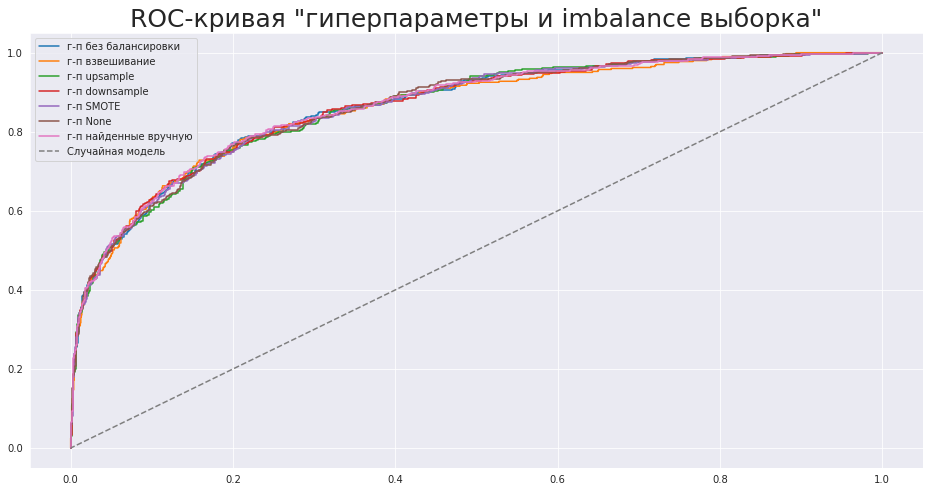

,ROC_AUC,best_threshold,f1,precision,recall,accuracy
г-п без балансировки (imbalance),0.862888,0.28,0.617849,0.570825,0.673317,0.8330
г-п взвешивание (imbalance),0.859300,0.10,0.622328,0.594104,0.653367,0.8410
г-п upsample (imbalance),0.860811,0.26,0.607843,0.539652,0.695761,0.8200
г-п downsample (imbalance),0.862316,0.30,0.623407,0.582251,0.670823,0.8375
г-п SMOTE (imbalance),0.861257,0.36,0.617157,0.634211,0.600998,0.8505
г-п None (imbalance),0.861913,0.34,0.611043,0.601449,0.620948,0.8415
г-п найденные вручную (imbalance),0.863793,0.30,0.621103,0.598152,0.645885,0.8420


In [64]:
# Сравним гиперпарматеры на выборке с дисбалансом
imbalance_results = hparam_models_characteristics(data_train, data_test, X, y, hparams, 'imbalance')
# Выведем таблицу на экран
imbalance_results

На данном графике мы видим, что ROC график у всех более-менее схож. Имеются небольшие колебания, но общая форма у всех одна. <br>
- Также, о схожести всех гиперапараметров говорит метрика ROC_AUC. У всех она в диапазоне от **0,85** до **0,86**.
- Самый оптимальный порог, почти у всех моделей варьируется от **0,1** до **0,34**.
- Самыми лучшими моделями, по метрике **F1**, являются выборки **downsample** и **взвешивание**. Значение метрики составило **0,62**. Возможно, такое поведение связано с тем, что мы обучали модели на несбалансированных данных

Проведем аналогичные действия для других выборок, а затем сравним все найденные результаты.

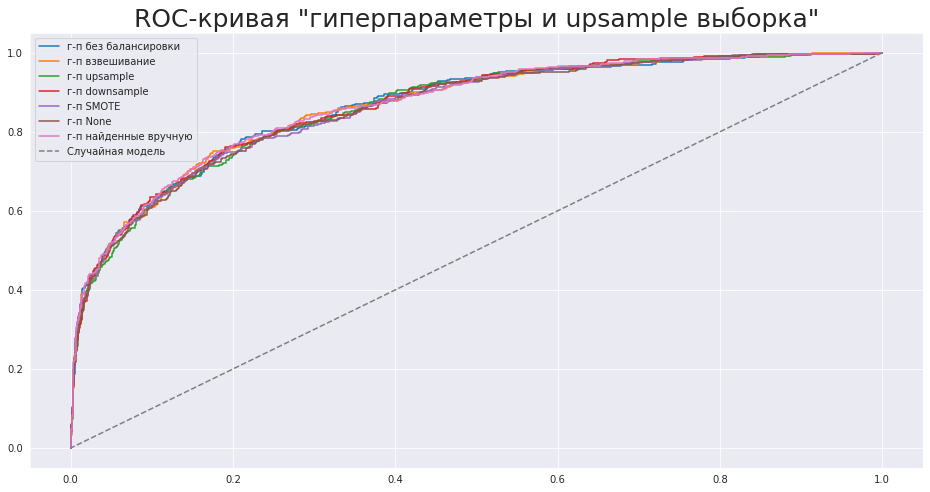

,ROC_AUC,best_threshold,f1,precision,recall,accuracy
г-п без балансировки (upsample),0.864334,0.68,0.621039,0.631443,0.610973,0.8505
г-п взвешивание (upsample),0.863336,0.42,0.621438,0.681548,0.571072,0.8605
г-п upsample (upsample),0.861065,0.64,0.616125,0.595349,0.638404,0.8405
г-п downsample (upsample),0.864351,0.68,0.627700,0.639896,0.615960,0.8535
г-п SMOTE (upsample),0.859576,0.66,0.612943,0.600478,0.625935,0.8415
г-п None (upsample),0.859089,0.62,0.607818,0.614796,0.600998,0.8445
г-п найденные вручную (upsample),0.865825,0.62,0.622066,0.587583,0.660848,0.8390


In [65]:
# Сравним гиперпарматеры на выборке сбалансированной методом upsample
upsample_results = hparam_models_characteristics(data_train_upsample, data_test, X, y, hparams, 'upsample')
# Выведем таблицу на экран
upsample_results

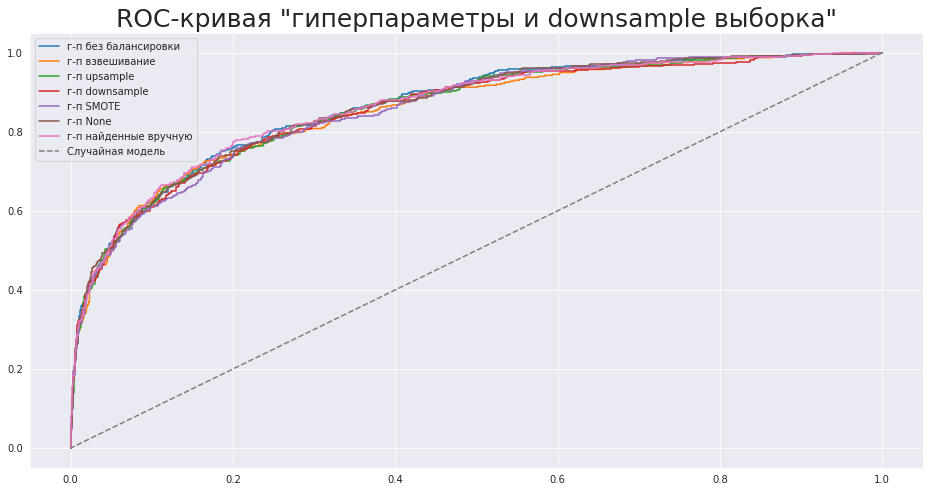

,ROC_AUC,best_threshold,f1,precision,recall,accuracy
г-п без балансировки (downsample),0.862986,0.68,0.620174,0.619403,0.620948,0.8475
г-п взвешивание (downsample),0.854133,0.36,0.628057,0.648936,0.608479,0.8555
г-п upsample (downsample),0.857183,0.66,0.620853,0.591422,0.653367,0.8400
г-п downsample (downsample),0.854703,0.76,0.625173,0.701863,0.563591,0.8645
г-п SMOTE (downsample),0.854994,0.72,0.608126,0.640884,0.578554,0.8505
г-п None (downsample),0.860273,0.70,0.616368,0.632546,0.600998,0.8500
г-п найденные вручную (downsample),0.861678,0.64,0.629454,0.600907,0.660848,0.8440


In [66]:
# Сравним гиперпарматеры на выборке сбалансированной методом downsample
downsample_results = hparam_models_characteristics(data_train_downsample, data_test, X, y, hparams, 'downsample')
# Выведем таблицу на экран
downsample_results

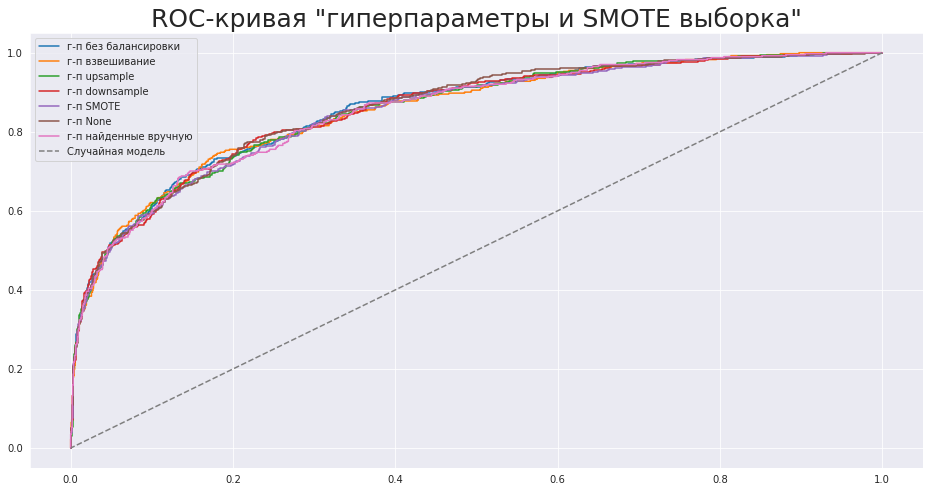

,ROC_AUC,best_threshold,f1,precision,recall,accuracy
г-п без балансировки (SMOTE),0.857069,0.44,0.615561,0.568710,0.670823,0.8320
г-п взвешивание (SMOTE),0.854087,0.28,0.617284,0.685976,0.561097,0.8605
г-п upsample (SMOTE),0.853758,0.44,0.613886,0.600000,0.628429,0.8415
г-п downsample (SMOTE),0.854870,0.44,0.607443,0.585648,0.630923,0.8365
г-п SMOTE (SMOTE),0.850288,0.50,0.610390,0.636856,0.586035,0.8500
г-п None (SMOTE),0.857302,0.56,0.603720,0.708054,0.526185,0.8615
г-п найденные вручную (SMOTE),0.852196,0.46,0.617813,0.563786,0.683292,0.8305


In [67]:
# Сравним гиперпарматеры на выборке сбалансированной методом SMOTE
SMOTE_results = hparam_models_characteristics(data_train_SMOTE, data_test, X, y, hparams, 'SMOTE')
# Выведем таблицу на экран
SMOTE_results

In [68]:
# Объединяем все результаты в единую таблицу
all_results = pd.concat([imbalance_results] + [upsample_results] + [downsample_results] + [SMOTE_results])

#### Проверка моделей на адекватность

Перед тем, как подводить итоги, убедимся, что мы проделали такой большой путь не зря. Посмотрим, как себя будут вести случайные модели.<br>
Функция, которая сравнивает модели по различным гиперапараметрам нам не очень подходит, поэтому разработаем новую для данных целей:

In [69]:
# Функция, которая будет показывать ключевые метрики модели
def print_model_metrics(data_train, data_test, features, target, title, model=None):
    '''
    Выводит на экран метрики качества модели, а также строит график.
    
            Параметры:
                    data_train(Dataframe): набор данных, по которым будет обучение.
                    data_test(Dataframe): набор данных, по которым будет высчитывание метрик.
                    features(list): массив названий столбцов признаков.
                    target(string): название целевого признака.
    '''
    if model == None:
        # Создаём модель кэтбуст
        model = CatBoostClassifier(silent=True)
    # Обучаем модель
    model.fit(data_train[features], data_train[target])
    # Предсказываем
    pred_prob_one = model.predict_proba(data_test[features])[:, 1]
    # Получаем данные для построения кривой
    fpr, tpr, _ = roc_curve(data_test[target], pred_prob_one)
    # Строим график по данным
    plt.plot(fpr, tpr)
    # Строим график случайной модели
    plt.plot([1,0], [1,0], linestyle='--')
    # Название
    plt.title(f'ROC-кривая {title}', fontsize=16)
    # Легенда
    plt.legend(['Текущая модель', 'Случайная модель'])
    # Показываем
    plt.show()
    # Вычисляем метрики
    metrics = get_main_metrics(data_test[target], pred_prob_one)
    # Выводим
    print('''ROC-AUC: {:.3f}, лучший порог: {:.2f}, f1: {:.3f}, precision: {:.3f}, recall: {:.3f}, accuracy: {:.3f}'''
              .format(metrics['roc_auc'], metrics['best_threshold'], 
                      metrics['f1'], metrics['precision'], metrics['recall'], metrics['accuracy']))

In [70]:
# Импортируем модель для проверки на адекватность (•_•)
from sklearn.dummy import DummyClassifier

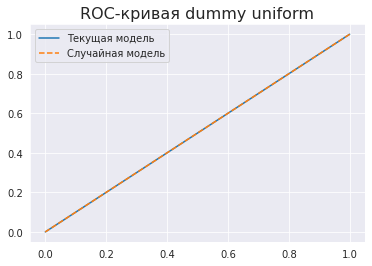

ROC-AUC: 0.500, лучший порог: 0.00, f1: 0.334, precision: 0.201, recall: 1.000, accuracy: 0.201


In [71]:
# Случайное выпадение 0 и 1 с равным шансом
model = DummyClassifier(strategy="uniform" ,random_state=2007)
# Выводим показатели
print_model_metrics(data_train, data_test, X, y, title='dummy uniform', model=model)

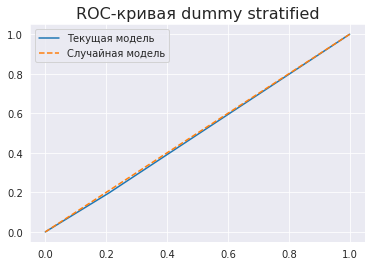

ROC-AUC: 0.494, лучший порог: 0.00, f1: 0.194, precision: 0.191, recall: 0.197, accuracy: 0.672


In [72]:
# Отдельные группы. Группировка по диапазонам и значениями
model = DummyClassifier(strategy="stratified" ,random_state=2007)
# Выводим показатели
print_model_metrics(data_train, data_test, X, y, title='dummy stratified', model=model)

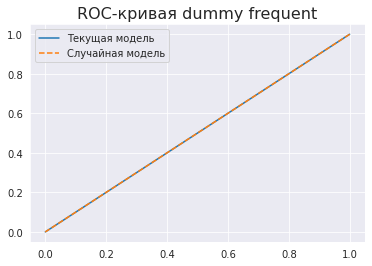

ROC-AUC: 0.500, лучший порог: 0.00, f1: 0.000, precision: 0.000, recall: 0.000, accuracy: 0.799


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# Поиск по самым частым значениям
model = DummyClassifier(strategy="most_frequent" ,random_state=2007)
# Выводим показатели
print_model_metrics(data_train, data_test, X, y, title='dummy frequent', model=model)

Сразу видно, что случайные модели сильно проигрывают обученным. Благодаря метрикам и графику мы види настоящее качество модели, хотя accuracy у двух моделей-подделок довольно высокие

#### Выводы

Все данные получены! Теперь посмотрим на них и сделаем выводы.

In [74]:
# Выводим результат в порядке убывания метрики F1
all_results.sort_values(by='f1', ascending=False)

,ROC_AUC,best_threshold,f1,precision,recall,accuracy
г-п найденные вручную (downsample),0.861678,0.64,0.629454,0.600907,0.660848,0.8440
г-п взвешивание (downsample),0.854133,0.36,0.628057,0.648936,0.608479,0.8555
г-п downsample (upsample),0.864351,0.68,0.627700,0.639896,0.615960,0.8535
г-п downsample (downsample),0.854703,0.76,0.625173,0.701863,0.563591,0.8645
г-п downsample (imbalance),0.862316,0.30,0.623407,0.582251,0.670823,0.8375
г-п взвешивание (imbalance),0.859300,0.10,0.622328,0.594104,0.653367,0.8410
г-п найденные вручную (upsample),0.865825,0.62,0.622066,0.587583,0.660848,0.8390
г-п взвешивание (upsample),0.863336,0.42,0.621438,0.681548,0.571072,0.8605
г-п найденные вручную (imbalance),0.863793,0.30,0.621103,0.598152,0.645885,0.8420
г-п без балансировки (upsample),0.864334,0.68,0.621039,0.631443,0.610973,0.8505


**Выводы:**
- В проекте мы имеем **28** разных моделей (в черновике их было за сотню)
- Самые лучший результат **f1** показала модель с гиперпараметрами **найденными вручную** и обучившуюся на выборке **downsample**. Рекорд составляет почти **0.63**.
- Самой точной оказалась модель с **гиперпараметрами downsample** и обученная на выборке **downsample**. **Precision** составляет **0.7**, а **f1** равен **0.62**. Также эта моель заняла первое место по **accuracy - 0.86**.
- Самой полной является модель с **гиперпараметрами для синтетических данных (SMOTE)** и обученной на **несбалансированной выборке**. **Recall = 0.71**.
- Самая большая **площадь под кривой** досталась модели с гиперапараметрами найденными вручную и обученной на **upsample** выборке - **0.865**.
- Почти у всех моделей довольно высокий показатель **ROC_AUC (от 0.853 по 0.865).**
- Все модели соответствуют условию проекта, **f1** не менее **0.59**.
- В процессе подбора гиперпараметров, было выявлено, что для данной набора данных **большая глубина вредит**. Модель становится сильно **переобученой**, из-за чего на тестовых данных выходили **низкие показатели**.<br>Оптимальной глубиной для CatBoost оказались значения от **1 до 3**.
- Мы сравнили наши модели со случайными и убедились, что обученные модели намного лучше.